In [1]:
from calc_influence_function import *
from train_influence_functions import load_model, load_data

/home/ikhtiyor/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/ikhtiyor/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZNK2at10TensorBase21__dispatch_contiguousEN3c1012MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
    
#     config = ptif.get_default_config()
model = load_model()
trainloader, testloader = load_data()
#     ptif.init_logging('logfile.log')
influences, harmful, helpful=calc_influence_single(model, trainloader, testloader,
                                                            test_id_num=45,gpu=-1, recursion_depth=500, r=10 )
    

Files already downloaded and verified
Files already downloaded and verified


/home/ikhtiyor/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/ikhtiyor/pytorch_influence_functions/Image_classification_Influence/calc_influence_function.py:71: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y = torch.nn.functional.log_softmax(y)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

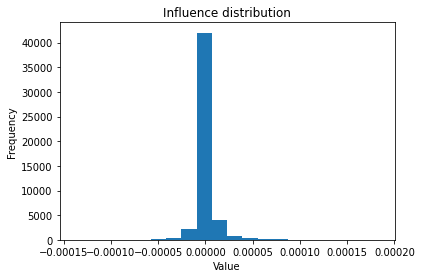

In [6]:
plt.hist(influences, bins=20)
plt.title("Influence distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
influence=np.array([i for i in influences if i>0])
len(influence)

24896

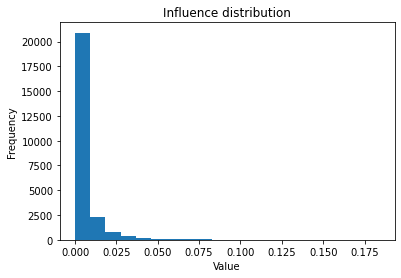

In [12]:
plt.hist(influence*1000, bins=20)
plt.title("Influence distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [8]:
q3, q1 = np.percentile(influence, [75 ,25])
iqr = q3 - q1

In [9]:
influenceIQ=np.array([i for i in influences if i>q3+1.5*iqr])
len(influenceIQ)

2481

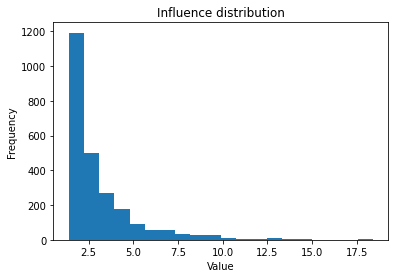

In [13]:
plt.hist(influenceIQ*100000, bins=20)
plt.title("Influence distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [14]:
q3a, q1a = np.percentile(influenceIQ, [75 ,25])
iqra = q3a - q1a

In [15]:
influenceIQ2=np.array([i for i in influenceIQ if i>q3a+1.5*iqra])
len(influenceIQ2)

198

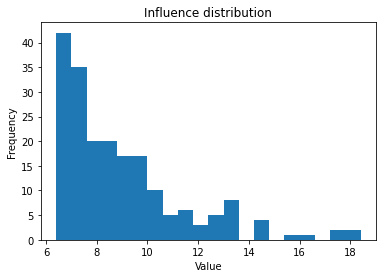

In [16]:
plt.hist(influenceIQ2*100000, bins=20)
plt.title("Influence distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()